# Predict MVP 2021

In [116]:
import pickle
import pandas as pd
import numpy as np

In [120]:
with open("player_stats.pkl", "rb") as f:
    season_2021 = pickle.load(f)
#tolgo seasons che non ci servono
season_2021 = season_2021[season_2021["SEASON_ID"] == 2020]

#sposto la colonna MVP per prima per comodita
cols = season_2021.columns.tolist()
cols = cols[-2:] + cols[:-2]
season_2021 = season_2021[cols]

season_2021["GP"]=season_2021["GP"].astype('int')
season_2021["FGM"]=season_2021["FGM"].astype('int')
season_2021["FGA"]=season_2021["FGA"].astype('int')
season_2021["FG3M"]=season_2021["FG3M"].astype('int')
season_2021["FG3A"]=season_2021["FG3A"].astype('int')
season_2021["FTM"]=season_2021["FTM"].astype('int')
season_2021["FTA"]=season_2021["FTA"].astype('int')
season_2021["OREB"]=season_2021["OREB"].astype('int')
season_2021["DREB"]=season_2021["DREB"].astype('int')
season_2021["REB"]=season_2021["REB"].astype('int')
season_2021["AST"]=season_2021["AST"].astype('int')
season_2021["STL"]=season_2021["STL"].astype('int')
season_2021["BLK"]=season_2021["BLK"].astype('int')
season_2021["TOV"]=season_2021["TOV"].astype('int')
season_2021["PF"]=season_2021["PF"].astype('int')
season_2021["PTS"]=season_2021["PTS"].astype('int')


season_2021

,MVP,CONF_RANK,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FGA,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
42,0.0,5,203500,2020,1610612760,26.0,63,1681.0,283,478,...,0.582,207,376,583,146,51,67,94,122,684
47,0.0,5,1628389,2020,1610612748,22.0,72,2417.0,440,790,...,0.691,176,559,735,368,82,93,204,182,1146
113,0.0,11,200746,2020,1610612759,34.0,53,1754.0,391,793,...,0.827,103,289,392,129,36,87,74,128,1001
128,0.0,5,1629734,2020,1610612748,23.0,2,13.0,1,2,...,0.000,2,1,3,0,0,0,1,1,2
130,0.0,13,1629638,2020,1610612740,21.0,47,591.0,98,266,...,0.676,9,75,84,89,17,8,54,57,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,0.0,14,1629027,2020,1610612737,21.0,60,2120.0,546,1249,...,0.860,32,223,255,560,65,8,289,104,1778
5948,0.0,10,203469,2020,1610612766,27.0,58,1341.0,251,479,...,0.682,160,251,411,88,40,25,75,140,642
5961,0.0,11,203092,2020,1610612759,30.0,2,4.0,1,4,...,0.000,3,1,4,0,0,0,0,0,2
5974,0.0,15,1627790,2020,1610612739,23.0,22,221.0,41,72,...,0.737,18,48,66,6,7,5,10,27,96


In [121]:
#standardizzazione i nostri dati per anno

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

num_cols = season_2021.columns
num_cols = num_cols.drop(["MVP",'CONF_RANK', 'PLAYER_ID', 'SEASON_ID', 'TEAM_ID'])

season_2021_norm=pd.DataFrame()
season_2021_norm = pd.concat([season_2021_norm, season_2021],axis=0,ignore_index=True)


In [122]:

for col in num_cols.tolist():
    season_2021_norm[[col]] = scaler.fit_transform(season_2021[[col]].to_numpy().reshape(-1,1))

    #train_data.loc[train_data['SEASON_ID']==year, col]=scaler.fit_transform(train_features.loc[train_features['SEASON_ID']==year, col].to_numpy().reshape(-1,1))

season_2021_norm

,MVP,CONF_RANK,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FGA,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,0.0,5,203500,2020,1610612760,-0.029722,1.078277,1.133275,0.916577,0.503056,...,-0.524599,3.993897,2.034892,2.625829,0.536605,0.907155,2.107939,0.835505,0.803630,0.681082
1,0.0,5,1628389,2020,1610612748,-1.005601,1.464756,2.157244,1.970397,1.485865,...,-0.042858,3.269398,3.515923,3.570890,2.569218,2.099321,3.216484,2.917862,1.817820,1.791605
2,0.0,11,200746,2020,1610612759,1.922036,0.648855,1.234837,1.641498,1.495315,...,0.558213,1.563321,1.330796,1.438285,0.380954,0.330300,2.960666,0.456895,0.905049,1.443064
3,0.0,5,1629734,2020,1610612748,-0.761631,-1.541195,-1.187349,-0.976272,-0.996358,...,-3.096830,-0.797142,-1.000007,-0.980325,-0.800159,-1.054150,-0.748697,-0.925033,-1.241654,-0.958263
4,0.0,13,1629638,2020,1610612740,-1.249571,0.391202,-0.383199,-0.325185,-0.164750,...,-0.109152,-0.633546,-0.401120,-0.476707,0.014718,-0.400382,-0.407607,0.078285,-0.295076,-0.321274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.0,14,1629027,2020,1610612737,-1.249571,0.949450,1.744039,2.681894,2.931728,...,0.704062,-0.096015,0.796653,0.586487,4.327153,1.445552,-0.407607,4.526956,0.499373,3.310763
587,0.0,10,203469,2020,1610612766,0.214248,0.863566,0.660246,0.701786,0.506206,...,-0.082635,2.895464,1.023259,1.556418,0.005562,0.484128,0.317212,0.475825,1.107887,0.580125
588,0.0,11,203092,2020,1610612759,0.946157,-1.541195,-1.199870,-0.976272,-0.990058,...,-3.096830,-0.773771,-1.000007,-0.974108,-0.800159,-1.054150,-0.748697,-0.943963,-1.258557,-0.958263
589,0.0,15,1627790,2020,1610612739,-0.761631,-0.682352,-0.897966,-0.707783,-0.775856,...,0.160446,-0.423207,-0.619633,-0.588622,-0.745223,-0.784951,-0.535516,-0.754658,-0.802171,-0.732312


## Predict 2021

In [123]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
test_2021_labels = season_2021_norm[["MVP"]]

name_model = "log_reg_no_pearson"

# with open("svm_40.pkl", "rb") as f:
with open(name_model+".pkl", "rb") as f:
# with open("svm.pkl", "rb") as f:
# with open("rf.pkl", "rb") as f:
# with open("log_reg.pkl", "rb") as f:

    log_reg = pickle.load(f)


    ###                             ###

# train_2021 = season_2021_norm[["CONF_RANK", "GP", "MIN", "FGM", "FG_PCT", "FG3M", "FG3_PCT", "FTM", "FT_PCT", "OREB", "DREB", "AST", "STL", "BLK", "TOV", "PF"]]
# train_2021 = season_2021_norm[["CONF_RANK", "GP", "MIN", "FG_PCT", "FG3M", "FG3_PCT", "FTM", "FT_PCT", "OREB", "DREB", "AST", "STL", "BLK", "PF"]]
train_2021 = season_2021_norm.drop(["MVP", 'PLAYER_ID', 'SEASON_ID', 'TEAM_ID', "PLAYER_AGE"], axis=1)


predicted_labels = log_reg.predict(train_2021)
print(f"The accuracy is  {accuracy_score(test_2021_labels,predicted_labels)}")


The accuracy is  0.9983079526226735


In [124]:
#Unisco i dataset
predict_2021 = pd.DataFrame(predicted_labels, columns=["MVP_Predict"])
predict_2021["PLAYER_ID"] = list(season_2021["PLAYER_ID"])

winners_id = predict_2021.loc[predict_2021["MVP_Predict"] == 1, "PLAYER_ID"]

In [125]:
from nba_api.stats.static import players

for id in list(winners_id):
    print(players.find_player_by_id(id))

{'id': 203507, 'full_name': 'Giannis Antetokounmpo', 'first_name': 'Giannis', 'last_name': 'Antetokounmpo', 'is_active': True}
{'id': 2544, 'full_name': 'LeBron James', 'first_name': 'LeBron', 'last_name': 'James', 'is_active': True}


### PROBABILITIES 2021

In [126]:

# test_2021_labels = season_2021_norm[["MVP"]]
#
# with open("log_reg.pkl", "rb") as f:
#     log_reg = pickle.load(f)

#train_2021 = season_2021_norm[["GP", "MIN", "FGM", "FG_PCT", "FG3M", "FG3_PCT", "FTM", "FT_PCT", "OREB", "DREB", "AST", "STL", "BLK", "TOV", "PF", 'CONF_RANK']]
predicted_labels = pd.DataFrame(log_reg.predict_proba(train_2021))

predicted_labels.rename(columns={0:'NOT',1:'MVP'},inplace=True)

predicted_labels = pd.DataFrame(predicted_labels, columns=["MVP"])
predicted_labels["PLAYER_ID"] = list(season_2021["PLAYER_ID"])

#Sort
mvp_candidates = predicted_labels.sort_values(by='MVP',ascending=False)

#Take only better
mvp_candidates = mvp_candidates.head(10)

mvp_candidates_names = pd.DataFrame()
# for row, id in mvp_candidates["PLAYER_ID"].iterrows():
#     name_player = players.find_player_by_id(id["PLAYER_ID"])
#     if name_player is not None:
#         name = pd.DataFrame.from_dict(name_player, orient="index")
#
#         name = name.transpose()
#         name["mvp_prob"] = list(id["MVP"])
#         mvp_candidates_names = pd.concat([mvp_candidates_names,name], axis=0, ignore_index=True)

for id in list(mvp_candidates["PLAYER_ID"]):
    name_player = players.find_player_by_id(id)
    name = pd.DataFrame.from_dict(name_player, orient="index")

    name = name.transpose()
    mvp_candidates_names = pd.concat([mvp_candidates_names,name], axis=0, ignore_index=True)

mvp_candidates_names["mvp_prob"] = list(mvp_candidates["MVP"])
mvp_candidates_names

,id,full_name,first_name,last_name,is_active,mvp_prob
0,2544,LeBron James,LeBron,James,True,0.999949
1,203507,Giannis Antetokounmpo,Giannis,Antetokounmpo,True,0.997567
2,203076,Anthony Davis,Anthony,Davis,True,0.212665
3,203999,Nikola Jokic,Nikola,Jokic,True,0.035742
4,203114,Khris Middleton,Khris,Middleton,True,0.027709
5,202695,Kawhi Leonard,Kawhi,Leonard,True,0.017731
6,201935,James Harden,James,Harden,True,0.010073
7,101150,Lou Williams,Lou,Williams,True,0.005530
8,202339,Eric Bledsoe,Eric,Bledsoe,True,0.001838
9,1628961,Kostas Antetokounmpo,Kostas,Antetokounmpo,False,0.001466


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'LeBron James'),
  Text(1, 0, 'Giannis Antetokounmpo'),
  Text(2, 0, 'Anthony Davis'),
  Text(3, 0, 'Nikola Jokic'),
  Text(4, 0, 'Khris Middleton'),
  Text(5, 0, 'Kawhi Leonard'),
  Text(6, 0, 'James Harden'),
  Text(7, 0, 'Lou Williams'),
  Text(8, 0, 'Eric Bledsoe'),
  Text(9, 0, 'Kostas Antetokounmpo')])

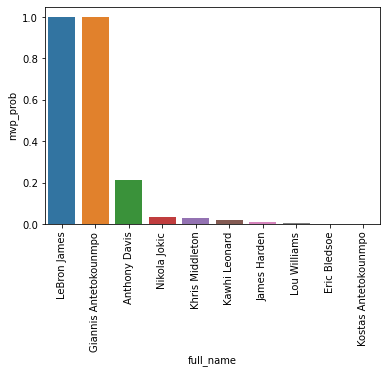

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
#mvp_candidates_names.plot.bar(x='full_name',y='mvp_prob' )
sns.barplot(x='full_name',y='mvp_prob',data=mvp_candidates_names.head(10))
plt.xticks(rotation=90)
#plt.savefig('plot/'+name_model+'.png', bbox_inches='tight')

In [82]:
real_winners_2021 = ["NIKOLA JOKIC", "JOEL EMBIID", "STEPHEN CURRY", "GIANNIS ANTETOKOUNMPO", "CHRIS PAUL", "LUKA DONCIC", "DAMIAN LILLARD", "JULIUS RANDLE", "DERRICK ROSE", "RUDY GOBERT"]

real_winners_2021 = [str.title() for str in real_winners_2021] #Title for capitalize name and surname

versus = pd.DataFrame()
versus["Predicted_rank"] = list(mvp_candidates_names["full_name"].head(10))
versus["Real_rank"] = real_winners_2021
weight = list(reversed(range(1,11)))
i = 0
score = 0

# for row, names in versus.iterrows():
#     if names["Predicted_rank"] == names["Real_rank"]:
#         score = score + weight[i]
#     else:
#         j = i + 1
#         real_name = names["Real_rank"]
#         while names["Predicted_rank"] != real_name or j < 9:
#             real_name = versus.at[j,"Real_rank"]
#             j = j + 1
#
#         if j > 10:
#             score = score + weight[j]
#
#     i = i+1

for row, names in versus.iterrows():
    if names["Predicted_rank"] == names["Real_rank"]:
        score = score + weight[0]

score = score / sum(weight)
score



0.0